In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# Read Data

In [2]:
#create the dataframe by reading 'breast.csv' file
df = pd.read_csv('breast.csv')

In [30]:
#display the dataframe
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,1
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,1
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,1
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,1


In [31]:
#check if there is no missing data, this will tell us how many missing data we have
df[df.isna().sum(axis=1) > 0]

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification


In [32]:
#find number of negative(-) class
num_of_negative = len(df[df.Classification == 0])
num_of_negative

52

In [33]:
#find number of positve(+) class
num_of_positive = len(df[df.Classification == 1])
num_of_positive

64

## find AV and SD

In [53]:
negative_sample = df[df.Classification == 0]
positive_sample = df[df.Classification == 1]

#### find AV

In [54]:
print("mean of age+: ",positive_sample["Age"].mean())
print("mean of age-: ",negative_sample["Age"].mean())
print("mean of bmi+: ",positive_sample["BMI"].mean())
print("mean of bmi-: ",negative_sample["BMI"].mean())
print("mean of glucose+: ",positive_sample["Glucose"].mean())
print("mean of glucose-: ",negative_sample["Glucose"].mean())
print("mean of insulin+: ",positive_sample["Insulin"].mean())
print("mean of insulin-: ",negative_sample["Insulin"].mean())
print("mean of homa+: ",positive_sample["HOMA"].mean())
print("mean of homa-: ",negative_sample["HOMA"].mean())
print("mean of leptin+: ",positive_sample["Leptin"].mean())
print("mean of leptin-: ",negative_sample["Leptin"].mean())
print("mean of adiponectin+: ",positive_sample["Adiponectin"].mean())
print("mean of adiponectin-: ",negative_sample["Adiponectin"].mean())
print("mean of resistin+: ",positive_sample["Resistin"].mean())
print("mean of resistin-: ",negative_sample["Resistin"].mean())
print("mean of mcp.1+: ",positive_sample["MCP.1"].mean())
print("mean of mcp.1-: ",negative_sample["MCP.1"].mean())

mean of age+:  56.671875
mean of age-:  58.07692307692308
mean of bmi+:  26.984740162968748
mean of bmi-:  28.317336260576926
mean of glucose+:  105.5625
mean of glucose-:  88.23076923076923
mean of insulin+:  12.51321875
mean of insulin-:  6.933769230769231
mean of homa+:  3.6233418198750003
mean of homa-:  1.5523977114999998
mean of leptin+:  26.596512499999996
mean of leptin-:  26.63793269230769
mean of adiponectin+:  10.061167421875
mean of adiponectin-:  10.328205096153845
mean of resistin+:  17.2537771875
mean of resistin-:  11.61481346153846
mean of mcp.1+:  563.0165
mean of mcp.1-:  499.7306923076924


#### find SD

In [55]:
positive_sample.std(axis = 0, skipna = True)

Age                13.493155
BMI                 4.620398
Glucose            26.557440
Insulin            12.317738
HOMA                4.588943
Leptin             19.212451
Adiponectin         6.189466
Resistin           12.636979
MCP.1             384.001622
Classification      0.000000
dtype: float64

In [56]:
negative_sample.std(axis = 0, skipna = True)

Age                18.957999
BMI                 5.427465
Glucose            10.191529
Insulin             4.859793
HOMA                1.218256
Leptin             19.334699
Adiponectin         7.631281
Resistin           11.447053
MCP.1             292.242157
Classification      0.000000
dtype: float64

#### find MIN and MAX

In [57]:
print("max of age+: ",positive_sample["Age"].max())
print("max of age-: ",negative_sample["Age"].max())
print("max of bmi+: ",positive_sample["BMI"].max())
print("max of bmi-: ",negative_sample["BMI"].max())
print("max of glucose+: ",positive_sample["Glucose"].max())
print("max of glucose-: ",negative_sample["Glucose"].max())
print("max of insulin+: ",positive_sample["Insulin"].max())
print("max of insulin-: ",negative_sample["Insulin"].max())
print("max of homa+: ",positive_sample["HOMA"].max())
print("max of homa-: ",negative_sample["HOMA"].max())
print("max of leptin+: ",positive_sample["Leptin"].max())
print("max of leptin-: ",negative_sample["Leptin"].max())
print("max of adiponectin+: ",positive_sample["Adiponectin"].max())
print("max of adiponectin-: ",negative_sample["Adiponectin"].max())
print("max of resistin+: ",positive_sample["Resistin"].max())
print("max of resistin-: ",negative_sample["Resistin"].max())
print("max of mcp.1+: ",positive_sample["MCP.1"].max())
print("max of mcp.1-: ",negative_sample["MCP.1"].max())

max of age+:  86
max of age-:  89
max of bmi+:  37.109375
max of bmi-:  38.57875854
max of glucose+:  201
max of glucose-:  118
max of insulin+:  58.46
max of insulin-:  26.211
max of homa+:  25.05034187
max of homa-:  7.111917999999999
max of leptin+:  90.28
max of leptin-:  83.4821
max of adiponectin+:  33.75
max of adiponectin-:  38.04
max of resistin+:  55.2153
max of resistin-:  82.1
max of mcp.1+:  1698.44
max of mcp.1-:  1256.083


In [58]:
print("min of age+: ",positive_sample["Age"].min())
print("min of age-: ",negative_sample["Age"].min())
print("min of bmi+: ",positive_sample["BMI"].min())
print("min of bmi-: ",negative_sample["BMI"].min())
print("min of glucose+: ",positive_sample["Glucose"].min())
print("min of glucose-: ",negative_sample["Glucose"].min())
print("min of insulin+: ",positive_sample["Insulin"].min())
print("min of insulin-: ",negative_sample["Insulin"].min())
print("min of homa+: ",positive_sample["HOMA"].min())
print("min of homa-: ",negative_sample["HOMA"].min())
print("min of leptin+: ",positive_sample["Leptin"].min())
print("min of leptin-: ",negative_sample["Leptin"].min())
print("min of adiponectin+: ",positive_sample["Adiponectin"].min())
print("min of adiponectin-: ",negative_sample["Adiponectin"].min())
print("min of resistin+: ",positive_sample["Resistin"].min())
print("min of resistin-: ",negative_sample["Resistin"].min())
print("min of mcp.1+: ",positive_sample["MCP.1"].min())
print("min of mcp.1-: ",negative_sample["MCP.1"].min())

min of age+:  34
min of age-:  24
min of bmi+:  18.37
min of bmi-:  18.67
min of glucose+:  70
min of glucose-:  60
min of insulin+:  2.432
min of insulin-:  2.707
min of homa+:  0.5079359999999999
min of homa-:  0.46740866700000006
min of leptin+:  6.3339
min of leptin-:  4.311
min of adiponectin+:  1.65602
min of adiponectin-:  2.19428
min of resistin+:  3.21
min of resistin-:  3.29175
min of mcp.1+:  90.09
min of mcp.1-:  45.843


# Extract feature set and label set

In [40]:
#extract the features for training
train_feature = pd.DataFrame(df.iloc[:,:-1])
#make sure the size of train_feature is correct
train_feature.shape

(116, 9)

In [41]:
#extract the label for training
train_label = pd.DataFrame(df.iloc[:,-1])
#make sure the size of train_label is correct
train_label.shape

(116, 1)

# Use Grid Search to Find Best Mtry and Ntree

In [42]:
#get the number of features
num_feature = len(train_feature.columns)

In [43]:
#find three values of Mtry
mtry_1 = 0.5 * math.sqrt(num_feature)
mtry_2 = math.sqrt(num_feature)
mtry_3 = 2 * math.sqrt(num_feature)

In [44]:
#take the value of mtry_1 as 2 to let the input of max_feature be int
mtry_1

1.5

In [45]:
#take the value of mtry_2 as 3 to let the input of max_feature be int
mtry_2

3.0

In [46]:
#take the value of mtry_3 as 6 to let the input of max_feature be int
mtry_3

6.0

In [47]:
#parameters list for tuning
mtry = [2,3,6]
ntree = [500,1000]

In [48]:
#do grid search 
for i in range (2):
    for j in range (3):
        nTree = ntree[i]
        mTry = mtry[j]
        #create a RF model
        model = RandomForestClassifier(n_estimators=nTree, max_features=mTry, oob_score= True, random_state = 0)
        #train the RF model
        model.fit(train_feature, train_label)
        #use decision funciton estimated on training set to find prediction based on training set
        prediction = np.argmax(model.oob_decision_function_, axis = 1)
        #print out ntree value and mtry value with their corresponding f1 score
        print("nTree = ", nTree, "     mTry = " , mTry)
        print("F1: ", f1_score(train_label, prediction))

/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


nTree =  500      mTry =  2
F1:  0.725925925925926


/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


nTree =  500      mTry =  3
F1:  0.7669172932330827


/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


nTree =  500      mTry =  6
F1:  0.8181818181818182


/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


nTree =  1000      mTry =  2
F1:  0.7407407407407407


/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


nTree =  1000      mTry =  3
F1:  0.7761194029850748


/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


nTree =  1000      mTry =  6
F1:  0.8059701492537314


# Use the Best Mtry and Ntree to Create the Best RF Model

In [49]:
#use the best split to create best RF model
model = RandomForestClassifier(random_state = 0, max_features = 6, n_estimators = 500,oob_score = True)
#apply the training data to the model
model.fit(train_feature, train_label)

/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(max_features=6, n_estimators=500, oob_score=True,
                       random_state=0)

# Evaluate the Best RF Classifier Model

In [50]:
#get prediction based on oob of training set
prediction = np.argmax(model.oob_decision_function_, axis = 1)

## Confusion Matrix

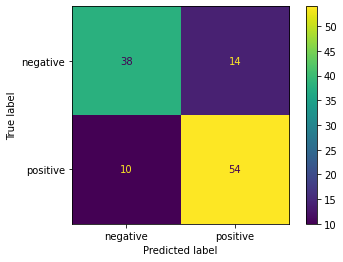

In [51]:
cm = confusion_matrix(train_label, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['negative', 'positive'])
disp.plot()
plt.show()

## F1 Score

In [52]:
#prediction is based on training set
#get F1 score based on training phase
print('F1 Score: ', f1_score(train_label, prediction))

F1 Score:  0.8181818181818182


## OOB Score

In [59]:
#get OOB score based on training phase
print('OOB Score: ', model.oob_score_)

OOB Score:  0.7931034482758621


## Accuracy

In [60]:
#get the accuracy of trained RF model
accuracy_score(train_label, prediction)

0.7931034482758621

## Feature Ranking

In [63]:
#get the idex of top 10 features 
index = np.argsort(model.feature_importances_)[-9:].tolist()
#reverse the index list (=index.T)
index.reverse()
#get the top 10 features according to the index list
top_feature = [(train_feature.columns[idx], model.feature_importances_[idx]) for idx in index]
#display the top_feature list
top_feature

[('Glucose', 0.22763148138007147),
 ('Resistin', 0.15216146844477346),
 ('BMI', 0.14295925304554677),
 ('Age', 0.13365917453644227),
 ('HOMA', 0.0808891523147242),
 ('Leptin', 0.0750579365989072),
 ('Insulin', 0.06763327073708585),
 ('Adiponectin', 0.06588999639426381),
 ('MCP.1', 0.054118266548184996)]

Text(0, 0.5, 'Feature Name')

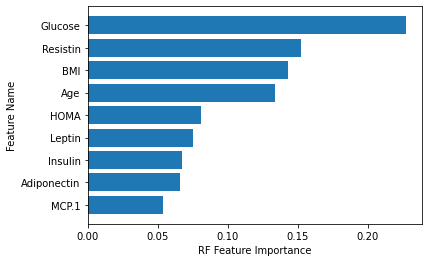

In [64]:
#draw a bar chart to make it more clear
plt.barh(train_feature.columns[index], model.feature_importances_[index])
plt.gca().invert_yaxis()
plt.xlabel("RF Feature Importance")
plt.ylabel("Feature Name")

# RFEX Model Explainer

## Cumulative F1 score 

### top 4 feature

In [65]:
train_feature_top_4 = train_feature[['Glucose','Resistin','BMI','Age']]

In [66]:
#get the number of features
num_feature = len(train_feature_top_4.columns)

In [67]:
#find three values of Mtry
mtry_1 = 0.5 * math.sqrt(num_feature)
mtry_2 = math.sqrt(num_feature)
mtry_3 = 2 * math.sqrt(num_feature)

In [68]:
#parameters list for tuning
mtry_4 = [1,2,3]
ntree_4 = [500,1000]

In [69]:
#do grid search 
for i in range (2):
    for j in range (3):
        nTree = ntree_4[i]
        mTry = mtry_4[j]
        #create a RF model
        model = RandomForestClassifier(n_estimators=nTree, max_features=mTry, oob_score= True, random_state = 0)
        #train the RF model
        model.fit(train_feature_top_4, train_label)
        #use decision funciton estimated on training set to find prediction based on training set
        prediction = np.argmax(model.oob_decision_function_, axis = 1)
        #print out ntree value and mtry value with their corresponding f1 score
        print("nTree = ", nTree, "     mTry = " , mTry)
        print("F1: ", f1_score(train_label, prediction))

/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


nTree =  500      mTry =  1
F1:  0.7938931297709924


/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


nTree =  500      mTry =  2
F1:  0.8333333333333333


/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


nTree =  500      mTry =  3
F1:  0.8244274809160305


/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


nTree =  1000      mTry =  1
F1:  0.8181818181818182


/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


nTree =  1000      mTry =  2
F1:  0.8208955223880597


/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


nTree =  1000      mTry =  3
F1:  0.8181818181818182


In [70]:
#use the best split to create best RF model
model_4 = RandomForestClassifier(random_state = 0, max_features = 2, n_estimators = 500,oob_score = True)
#apply the training data to the model
model_4.fit(train_feature_top_4, train_label)

/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(max_features=2, n_estimators=500, oob_score=True,
                       random_state=0)

In [71]:
#get prediction based on oob of training set
prediction_4 = np.argmax(model_4.oob_decision_function_, axis = 1)

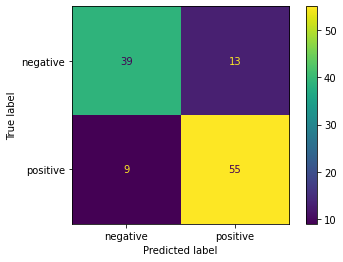

In [72]:
#plot confusion matrix
cm_4 = confusion_matrix(train_label, prediction_4)
disp_4 = ConfusionMatrixDisplay(confusion_matrix = cm_4, display_labels = ['negative', 'positive'])
disp_4.plot()
plt.show()

In [73]:
#prediction is based on training set
#get F1 score based on training phase
print('F1 Score for top 4 ranked features: ', f1_score(train_label, prediction_4))

F1 Score for top 4 ranked features:  0.8333333333333333


### top 7 feature

In [74]:
train_feature_top_7 = train_feature[['Glucose','Resistin','BMI','Age','HOMA','Leptin','Insulin']]

In [75]:
#get the number of features
num_feature = len(train_feature_top_7.columns)

In [76]:
#find three values of Mtry
mtry_1 = 0.5 * math.sqrt(num_feature)
mtry_2 = math.sqrt(num_feature)
mtry_3 = 2 * math.sqrt(num_feature)

In [77]:
#parameters list for tuning
mtry_7 = [2,3,4]
ntree_7 = [500,1000]

In [78]:
#do grid search 
for i in range (2):
    for j in range (3):
        nTree = ntree_7[i]
        mTry = mtry_7[j]
        #create a RF model
        model = RandomForestClassifier(n_estimators=nTree, max_features=mTry, oob_score= True, random_state = 0)
        #train the RF model
        model.fit(train_feature_top_7, train_label)
        #use decision funciton estimated on training set to find prediction based on training set
        prediction = np.argmax(model.oob_decision_function_, axis = 1)
        #print out ntree value and mtry value with their corresponding f1 score
        print("nTree = ", nTree, "     mTry = " , mTry)
        print("F1: ", f1_score(train_label, prediction))

/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


nTree =  500      mTry =  2
F1:  0.7555555555555555


/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


nTree =  500      mTry =  3
F1:  0.7969924812030075


/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


nTree =  500      mTry =  4
F1:  0.8030303030303031


/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


nTree =  1000      mTry =  2
F1:  0.7794117647058824


/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


nTree =  1000      mTry =  3
F1:  0.7941176470588235


/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


nTree =  1000      mTry =  4
F1:  0.8030303030303031


In [44]:
#use the best split to create best RF model
model_7 = RandomForestClassifier(random_state = 0, max_features = 4, n_estimators = 500,oob_score = True)
#apply the training data to the model
model_7.fit(train_feature_top_7, train_label)

/Users/nianziyi/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(max_features=4, n_estimators=500, oob_score=True,
                       random_state=0)

In [45]:
#get prediction based on oob of training set
prediction_7 = np.argmax(model_7.oob_decision_function_, axis = 1)

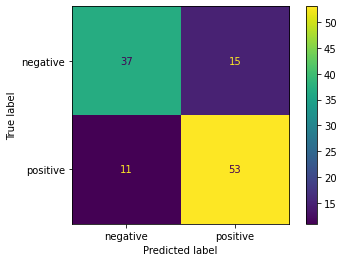

In [46]:
#plot confusion matrix
cm_7 = confusion_matrix(train_label, prediction_7)
disp_7 = ConfusionMatrixDisplay(confusion_matrix = cm_7, display_labels = ['positive', 'negative'])
disp_7.plot()
plt.show()

In [47]:
#prediction is based on training set
#get F1 score based on training phase
print('F1 Score for top 7 ranked features: ', f1_score(train_label, prediction_7))

F1 Score for top 7 ranked features:  0.8030303030303031
